In [42]:
from fit_completeness_to_catalog import *
name = "barclay"
cut_to_Ms = True
nwalkers = 24
ndim = 8
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Selected 415 stars


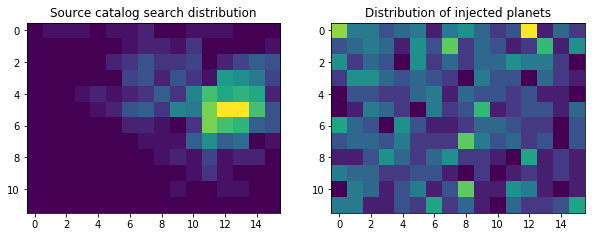

Injected 588 transiting planets


In [50]:
catalog, num_stars = get_catalog_and_numstars(name, cut_to_Ms)
synth = make_synth_solar_systems(num_stars=10000)
synth = synth[synth.transit_bool]
hist_synth, hist_catalog = make_hists(synth, catalog)
print("Injected {} transiting planets".format(int(np.sum(hist_synth))))

In [45]:
ll, p0 = make_mcmc_setup(hist_synth, hist_catalog, nwalkers)
sampler = emcee.EnsembleSampler(nwalkers, ndim, ll)
_ = sampler.run_mcmc(p0, 1000, progress="notebook")
sampler.reset()
pos, _, _ = sampler.run_mcmc(p0, 5000, store=True, progress="notebook")

Found least-squares solution: [ 1.04771737e+00 -1.48504113e-02  2.47476233e-07  3.35491744e-02
  7.57125560e-02 -3.15038649e-02  4.27677528e-02 -3.72666392e-02]
Set initial condition


In [46]:
# _ = corner.corner(sampler.flatchain)

In [47]:
ll(np.mean(sampler.flatchain,axis=0))

-593.6961813574002

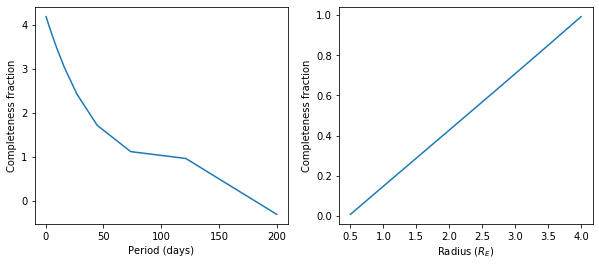

In [48]:
params = np.mean(sampler.flatchain, axis=0)
plot_marginalized_comps(params)

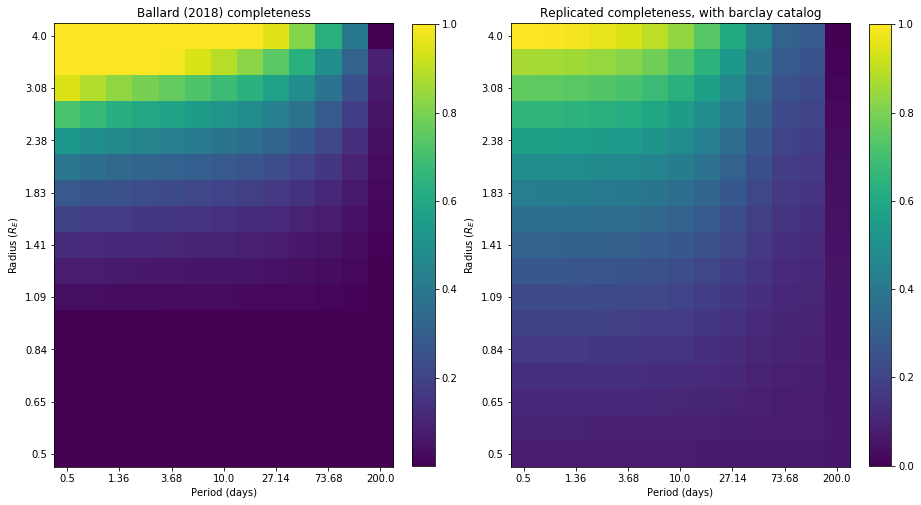

In [49]:
repcomp = np.outer(comp_poly(bins_p, *params[:4]), comp_poly(bins_r, *params[4:])).T
repcomp -= np.min(repcomp)
repcomp /= np.max(repcomp)
plot_overall_comps(repcomp, name)